Подбор гиперпараметров


In [4]:
"""

Рост числа супермаркетов в большинстве населенных городов увеличивается, и конкуренция на рынке также высока.
Набор данных представляет собой один из исторических данных о продажах компании-супермаркета, который был зарегистрирован в 3 различных филиалах за 3 месяца.

Поскольку данные исторические и имеют временную зависимость, в работе необходимо учесть порядок записей и при разбиении на трейн и тест следить за тем, чтобы данные в тесте были дальше на временном отрезке
"""

'\n\nРост числа супермаркетов в большинстве населенных городов увеличивается, и конкуренция на рынке также высока.\nНабор данных представляет собой один из исторических данных о продажах компании-супермаркета, который был зарегистрирован в 3 различных филиалах за 3 месяца.\n\nПоскольку данные исторические и имеют временную зависимость, в работе необходимо учесть порядок записей и при разбиении на трейн и тест следить за тем, чтобы данные в тесте были дальше на временном отрезке\n'

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.metrics import confusion_matrix

In [6]:
features=pd.read_csv("/content/features.csv")
store=pd.read_csv("/content/stores.csv")
train=pd.read_csv("/content/train.csv")
test=pd.read_csv("/content/test.csv")

In [7]:
train=train.groupby(['Store','Date'])['Weekly_Sales'].sum()
train=train.reset_index()
data=pd.merge(train,features,on=['Store','Date'],how='inner')
data=pd.merge(data,store,on=['Store'],how='inner')
data.head(10)

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,1643690.90,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,1641957.44,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,1611968.17,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,1409727.59,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,1554806.68,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315
5,1,2010-03-12,1439541.59,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False,A,151315
6,1,2010-03-19,1472515.79,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False,A,151315
7,1,2010-03-26,1404429.92,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False,A,151315
8,1,2010-04-02,1594968.28,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False,A,151315
9,1,2010-04-09,1545418.53,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False,A,151315


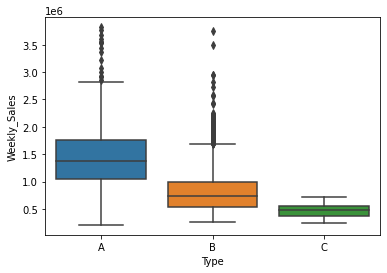

In [8]:
sns.boxplot(x='Type',y='Weekly_Sales',data=data)

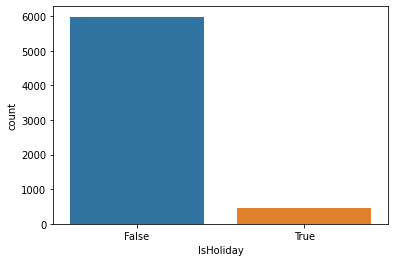

In [9]:
sns.countplot(x="IsHoliday", data=data)

In [10]:
data.isnull().sum()

Store              0
Date               0
Weekly_Sales       0
Temperature        0
Fuel_Price         0
MarkDown1       4155
MarkDown2       4798
MarkDown3       4389
MarkDown4       4470
MarkDown5       4140
CPI                0
Unemployment       0
IsHoliday          0
Type               0
Size               0
dtype: int64

In [11]:
"""
Признаки 'MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5' имеют большое кол-во пропусков, не совсем понятно, как их заполнять.
Использовать их не представляется возможным, поэтому придется удалить.
"""

data=data.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1)

In [12]:
data['Holiday']=[int(i) for i in list(data.IsHoliday)]

In [13]:
Type_dummy=pd.get_dummies(data['Type'],drop_first=True)
data=pd.concat([data,Type_dummy],axis=1)
data=data.drop(['Type','IsHoliday'],axis=1)

In [14]:
"""
Как уже было сказано, данные имеют временную зависимость, для учета этой особенности мы отсортируем по времени наш набор таким образом, чтобы последние данные были в конце
и далее при использовании TrainTestSplit не будем смешивать данные, разделим ровно как есть чтобы не нарушить хронологию.
"""

'\nКак уже было сказано, данные имеют временную зависимость, для учета этой особенности мы отсортируем по времени наш набор таким образом, чтобы последние данные были в конце\nи далее при использовании TrainTestSplit не будем смешивать данные, разделим ровно как есть чтобы не нарушить хронологию.\n'

In [15]:
data = data.sort_values(by = 'Date')
print(data)

      Store        Date  Weekly_Sales  Temperature  Fuel_Price         CPI  \
0         1  2010-02-05    1643690.90        42.31       2.572  211.096358   
1287     10  2010-02-05    2193048.75        54.34       2.962  126.442065   
5148     37  2010-02-05     536006.73        45.97       2.572  209.852966   
2288     17  2010-02-05     789036.02        23.11       2.666  126.442065   
4147     30  2010-02-05     465108.52        39.05       2.572  210.752605   
...     ...         ...           ...          ...         ...         ...   
3574     25  2012-10-26     688940.94        56.69       3.882  216.151590   
714       5  2012-10-26     319550.77        71.70       3.506  224.037814   
5719     40  2012-10-26     921264.52        49.65       3.917  138.728161   
2573     18  2012-10-26    1127516.25        56.09       3.917  138.728161   
6434     45  2012-10-26     760281.43        58.85       3.882  192.308899   

      Unemployment    Size  Holiday  B  C  
0            8.106 

In [16]:
X=data.drop(['Weekly_Sales','Store','Date'],axis=1)
y=data['Weekly_Sales']

In [17]:
nom_cols=[8]

scale_cols=[0,3]

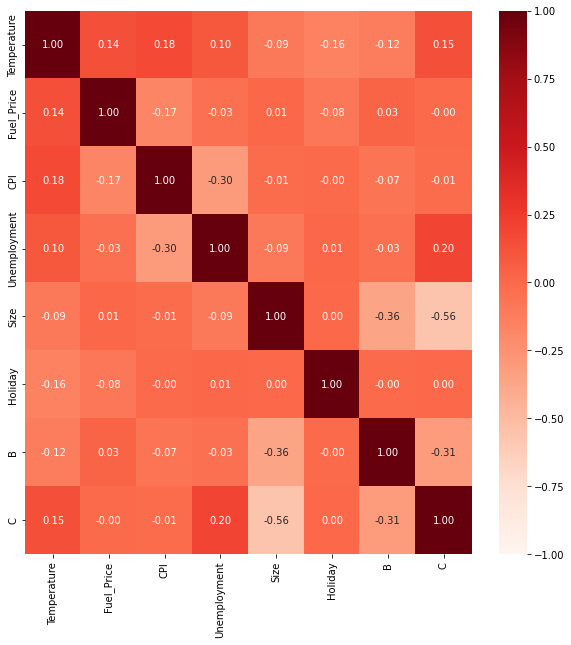

In [18]:
fig = plt.figure(figsize=(10,10))
fig.patch.set_facecolor('white')
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds,fmt='.2f', vmin=-1, vmax=1)

In [19]:
"""
Как видно по матрице корреляций, прямых зависимостей в данных нет, соответственно мультиколлинеарность не повлияет на результаты работы моделей.

"""

'\nКак видно по матрице корреляций, прямых зависимостей в данных нет, соответственно мультиколлинеарность не повлияет на результаты работы моделей.\n\n'

In [20]:
transf = make_column_transformer((OneHotEncoder(sparse=False,drop='first'), nom_cols),
                                 (StandardScaler(), scale_cols),
                                 remainder='passthrough')
transf

lab = LabelEncoder()
y = lab.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

Для эффективной работы моделей, в ходе экспериментов были подобраные оптимальные гиперпараметры, которые будут использованы при подсчете финальных метрик на тестовой выборке. 

KNeighborsRegressor with 2 n_neighbors MAE: 279.37606837606836, r2: 0.9571370897685573
KNeighborsRegressor with 5 n_neighbors MAE: 251.5951825951826, r2: 0.9666578555460781
KNeighborsRegressor with 8 n_neighbors MAE: 240.96649184149183, r2: 0.9690925298154629
KNeighborsRegressor with 11 n_neighbors MAE: 243.83343928798473, r2: 0.9680151742846965
KNeighborsRegressor with 14 n_neighbors MAE: 247.24747474747474, r2: 0.9676598613241988
KNeighborsRegressor with 17 n_neighbors MAE: 247.8281457104987, r2: 0.9678119220967278
KNeighborsRegressor with 20 n_neighbors MAE: 250.0448329448329, r2: 0.9674638144161543
KNeighborsRegressor with 23 n_neighbors MAE: 253.79058139927704, r2: 0.9665331348002856
KNeighborsRegressor with 26 n_neighbors MAE: 257.0712748789672, r2: 0.9657102237046709
KNeighborsRegressor with 29 n_neighbors MAE: 260.3932159794229, r2: 0.9646660717792717
KNeighborsRegressor with 32 n_neighbors MAE: 263.2934149184149, r2: 0.9640228589344224
KNeighborsRegressor with 35 n_neighbors M

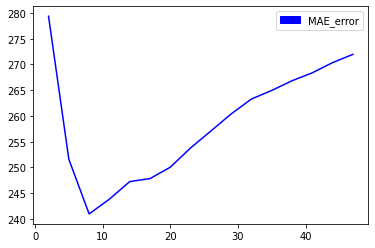

In [21]:
import matplotlib.patches as mpatches
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

r2_list = []
mae_list = []
param_list = []

for i in range(2, 50, 3):
  knn_c = KNeighborsRegressor(n_neighbors=i, algorithm="kd_tree", metric="minkowski")
  knn_c.fit(x_train, y_train)
  y_pred_knn=knn_c.predict(x_test)
  print(f'KNeighborsRegressor with {i} n_neighbors MAE: {mean_absolute_error(y_true=y_test, y_pred=y_pred_knn)}, r2: {r2_score(y_true=y_test, y_pred=y_pred_knn)}')
  r2_list.append(r2_score(y_true=y_test, y_pred=y_pred_knn))
  mae_list.append(mean_absolute_error(y_true=y_test, y_pred=y_pred_knn))
  param_list.append(i)


r2_patch = mpatches.Patch(color='red', label='r2_error')
mae_patch = mpatches.Patch(color='blue', label='MAE_error')
plt.legend(handles=[mae_patch])

plt.plot(param_list, mae_list, c='blue', linestyle="-")


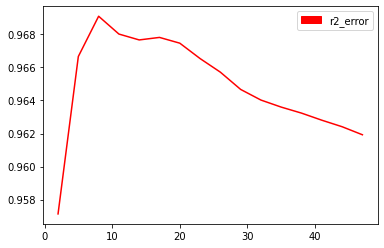

In [22]:
plt.legend(handles=[r2_patch])
plt.plot(param_list, r2_list, c='red', linestyle="-")

In [23]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score

knn_c = KNeighborsRegressor(n_neighbors=8, algorithm="kd_tree", metric="minkowski")
knn_c.fit(x_train, y_train)
y_pred_knn=knn_c.predict(x_test)

print(f'KNN MAE: {mean_absolute_error(y_true=y_test, y_pred=y_pred_knn)}, r2: {r2_score(y_true=y_test, y_pred=y_pred_knn)}')


KNN MAE: 240.96649184149183, r2: 0.9690925298154629


RandomForest with 10 estimators MAE: 264.31841491841493, r2: 0.9639552062308241
RandomForest with 25 estimators MAE: 261.95027195027194, r2: 0.9655336019587525
RandomForest with 40 estimators MAE: 259.1398018648019, r2: 0.9659060112016784
RandomForest with 55 estimators MAE: 255.61104753832024, r2: 0.9672617200531918
RandomForest with 70 estimators MAE: 254.17747807747807, r2: 0.9675188497572783
RandomForest with 85 estimators MAE: 255.38110516934046, r2: 0.9670925318520452
RandomForest with 100 estimators MAE: 254.8849728049728, r2: 0.9672074311286869
RandomForest with 115 estimators MAE: 252.72092159048682, r2: 0.9676232043868611
RandomForest with 130 estimators MAE: 253.70691530691533, r2: 0.9674330498020154
RandomForest with 145 estimators MAE: 253.14555100072337, r2: 0.9675447844706964
RandomForest with 160 estimators MAE: 253.24839743589743, r2: 0.9675156890760951
RandomForest with 175 estimators MAE: 253.566810966811, r2: 0.9673425870579334
RandomForest with 190 estimators MAE: 

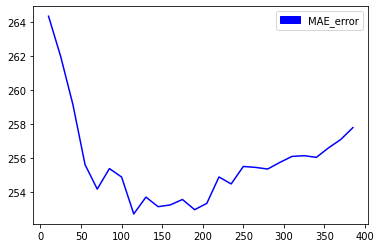

In [24]:
from sklearn.ensemble import RandomForestRegressor
r2_list = []
param_list = []
mae_list = []

for i in range(10, 400, 15):
  clf_rf = RandomForestRegressor(n_estimators=i, criterion = "squared_error", random_state = 42)
  clf_rf.fit(x_train, y_train)
  y_pred_rf=clf_rf.predict(x_test)
  print(f'RandomForest with {i} estimators MAE: {mean_absolute_error(y_true=y_test, y_pred=y_pred_rf)}, r2: {r2_score(y_true=y_test, y_pred=y_pred_rf)}')
  r2_list.append(r2_score(y_true=y_test, y_pred=y_pred_rf))
  mae_list.append(mean_absolute_error(y_true=y_test, y_pred=y_pred_rf))
  param_list.append(i)

r2_patch = mpatches.Patch(color='red', label='r2_error')
mae_patch = mpatches.Patch(color='blue', label='MAE_error')
plt.legend(handles=[mae_patch])
plt.plot(param_list, mae_list, c='blue', linestyle="-")


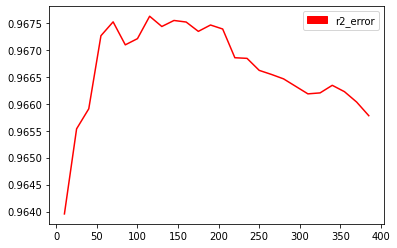

In [25]:
plt.legend(handles=[r2_patch])
plt.plot(param_list, r2_list, c='red', linestyle="-")

In [26]:
clf_rf = RandomForestRegressor(n_estimators=190, criterion = "squared_error", random_state = 42)
clf_rf.fit(x_train, y_train)
y_pred_rf=clf_rf.predict(x_test)

print(f'RandomForest MAE: {mean_absolute_error(y_true=y_test, y_pred=y_pred_rf)}, r2: {r2_score(y_true=y_test, y_pred=y_pred_rf)}')

RandomForest MAE: 252.96963562753035, r2: 0.9674606554889235


In [27]:
from sklearn.neural_network import MLPRegressor

mlp_r = MLPRegressor(hidden_layer_sizes=(25, 25, 25, 4, ), 
                     activation = 'relu', 
                     solver = 'adam', 
                     alpha = 0.00001, 
                     max_iter = 300)

mlp_r.fit(x_train, y_train)
y_pred_mlp = mlp_r.predict(x_test)
print(f'MLPC MAE: {mean_absolute_error(y_true=y_test, y_pred=y_pred_mlp)}, r2: {r2_score(y_true=y_test, y_pred=y_pred_mlp)}')

MLPC MAE: 724.690417258366, r2: 0.7665815616257337


In [28]:
"""
Промежуточные выводы по классическим моделям:
Задача хорошо подходит для регрессии - при определенной предобработке можно достичь хороших значений в точности
при том, что некоторые неудобства доставляет формат хранения и большое количество пропущенных значений для некоторых
признаков. Из всех испытанных методов (SVR, Linear Regression, KNN, RandomForestRegressor), наилучший результат показали алгоритмы Случайный Лес и КНН (были приведены в качестве примера в отчете).
"""

'\nПромежуточные выводы по классическим моделям:\nЗадача хорошо подходит для регрессии - при определенной предобработке можно достичь хороших значений в точности\nпри том, что некоторые неудобства доставляет формат хранения и большое количество пропущенных значений для некоторых\nпризнаков. Из всех испытанных методов (SVR, Linear Regression, KNN, RandomForestRegressor), наилучший результат показали алгоритмы Случайный Лес и КНН (были приведены в качестве примера в отчете).\n'

In [29]:
"""
Построим простую полносвязную нейронную сеть с разными параметрами.
Будем подбирать два параметра - L2 регуляризацию (alpha) и ширину второго скрытого слоя
"""

'\nПостроим простую полносвязную нейронную сеть с разными параметрами.\nБудем подбирать два параметра - L2 регуляризацию (alpha) и ширину второго скрытого слоя\n'

In [30]:
from sklearn.neural_network import MLPRegressor
import numpy as np

alphas = sorted(np.logspace(-3, 2, 30))
print(alphas)

[0.001, 0.0014873521072935117, 0.00221221629107045, 0.0032903445623126675, 0.004893900918477494, 0.007278953843983154, 0.010826367338740546, 0.01610262027560939, 0.02395026619987486, 0.03562247890262444, 0.0529831690628371, 0.07880462815669913, 0.11721022975334805, 0.1743328822199989, 0.2592943797404667, 0.38566204211634725, 0.5736152510448681, 0.8531678524172814, 1.2689610031679235, 1.8873918221350976, 2.8072162039411785, 4.175318936560405, 6.2101694189156165, 9.236708571873866, 13.738237958832638, 20.43359717856944, 30.39195382313201, 45.2035365636025, 67.23357536499334, 100.0]


In [31]:
train_mae = []
test_mae = []

for alpha in alphas:

  mlp_r = MLPRegressor(hidden_layer_sizes=(50, 35), 
                     activation = 'relu', 
                     solver = 'adam', 
                     alpha = alpha, 
                     max_iter = 1000,
                     random_state = 1)
 
  mlp_r.fit(x_train, y_train)
  y_train_pred_mlp=mlp_r.predict(x_train)
  y_test_pred_mlp=mlp_r.predict(x_test)

  train_mae.append(mean_absolute_error(y_test, y_test_pred_mlp))
  test_mae.append(mean_absolute_error(y_train, y_train_pred_mlp))

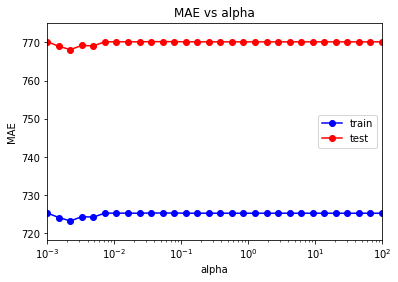

In [32]:
plt.semilogx(alphas, train_mae, 'b-o', label = 'train')
plt.semilogx(alphas, test_mae, 'r-o', label = 'test')
plt.xlim([np.min(alphas), np.max(alphas)])
plt.ylim(min(train_mae+test_mae)-5, max(train_mae+test_mae)+5)
plt.title('MAE vs alpha')
plt.xlabel('alpha')
plt.ylabel('MAE')
plt.legend()

In [33]:
sizes = sorted(np.random.randint(low = 10, high = 200, size = 10))
r2_list = []
mae_list = []

for l_size in sizes:

  mlp_r = MLPRegressor(hidden_layer_sizes=(100, l_size, ), 
                     activation = 'relu', 
                     solver = 'lbfgs', 
                     alpha = 0.02, 
                     max_iter = 400,
                     random_state = 1)
 
  mlp_r.fit(x_train, y_train)
  y_train_pred_mlp=mlp_r.predict(x_train)
  y_test_pred_mlp=mlp_r.predict(x_test)
  print(f'MLPR with 2nd hidden layer size = "{l_size}" MAE: {mean_absolute_error(y_true=y_test, y_pred=y_test_pred_mlp)}, r2: {r2_score(y_true=y_test, y_pred=y_test_pred_mlp)}')
  r2_list.append(r2_score(y_true=y_test, y_pred=y_test_pred_mlp))
  mae_list.append(mean_absolute_error(y_true=y_test, y_pred=y_test_pred_mlp))

MLPR with 2nd hidden layer size = "14" MAE: 712.6215611823847, r2: 0.7709773536024908


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPR with 2nd hidden layer size = "34" MAE: 706.458310995559, r2: 0.7757673869145685


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPR with 2nd hidden layer size = "42" MAE: 711.1190557221616, r2: 0.7715675951230802
MLPR with 2nd hidden layer size = "73" MAE: 714.4226587726668, r2: 0.7694280989752417
MLPR with 2nd hidden layer size = "95" MAE: 710.95533584691, r2: 0.7735666833410201
MLPR with 2nd hidden layer size = "106" MAE: 713.9978346205579, r2: 0.7694901226544014
MLPR with 2nd hidden layer size = "148" MAE: 714.1370920547523, r2: 0.7693300049191334
MLPR with 2nd hidden layer size = "192" MAE: 711.0469699209967, r2: 0.7735593701639717
MLPR with 2nd hidden layer size = "198" MAE: 711.0921098403445, r2: 0.7735050571906025
MLPR with 2nd hidden layer size = "199" MAE: 713.8832131032407, r2: 0.7695874550087854


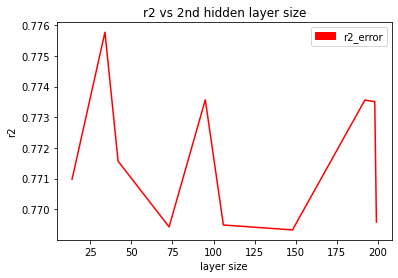

In [34]:
r2_patch = mpatches.Patch(color='red', label='r2_error')
mae_patch = mpatches.Patch(color='blue', label='MAE_error')
plt.legend(handles=[r2_patch])
plt.title('r2 vs 2nd hidden layer size')
plt.xlabel('layer size')
plt.ylabel('r2')

plt.plot(sizes, r2_list, c='red',linestyle = "-")

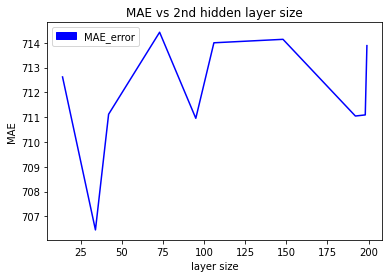

In [35]:
plt.plot(sizes, mae_list, c='blue', linestyle = "-")
plt.title('MAE vs 2nd hidden layer size')
plt.xlabel('layer size')
plt.ylabel('MAE')
plt.legend(handles=[mae_patch])

In [36]:
"""
Выводы по нейронным сетям:
С помощью нейронных моделей, задача решается хуже, чем классическими моделями.
В ходе экспериментов была выявлена плохая обобщаяющая способность нейросетевых моделей на маленьких наборах данных. 
"""


'\nВыводы по нейронным сетям:\nС помощью нейронных моделей, задача решается хуже, чем классическими моделями.\nВ ходе экспериментов была выявлена плохая обобщаяющая способность нейросетевых моделей на маленьких наборах данных. \n'